In [22]:
import random
import math
import sys

sys.setrecursionlimit(1700)\

x = []
w = []

for i in range(0, 728):
    x.append(random.randrange(255))
    w.append(random.uniform(-1.0, 1.0))

def activation(y):

    y = max(min(y, 100), -100)
    return 1 / (1 + math.e**-y)

def feedback(w, x, iteration=0):
    y = 0
    for i in range(0, 728):
        y += x[i] * w[i]
    h = activation(y)
    print(f"Iteration {iteration}: h = {h}")
    
    if h < 0.5 and sys.getrecursionlimit() > 0: 
        for i in range(0, 728):
            w[i] = w[i]+0.2*w[i]
        return feedback(w, x, iteration + 1)
    else:
        return h

l = feedback(w, x)
print("Final result:", l)



Iteration 0: h = 3.7200759760208555e-44
Iteration 1: h = 3.7200759760208555e-44
Iteration 2: h = 3.7200759760208555e-44
Iteration 3: h = 3.7200759760208555e-44
Iteration 4: h = 3.7200759760208555e-44
Iteration 5: h = 3.7200759760208555e-44
Iteration 6: h = 3.7200759760208555e-44
Iteration 7: h = 3.7200759760208555e-44
Iteration 8: h = 3.7200759760208555e-44
Iteration 9: h = 3.7200759760208555e-44
Iteration 10: h = 3.7200759760208555e-44
Iteration 11: h = 3.7200759760208555e-44
Iteration 12: h = 3.7200759760208555e-44
Iteration 13: h = 3.7200759760208555e-44
Iteration 14: h = 3.7200759760208555e-44
Iteration 15: h = 3.7200759760208555e-44
Iteration 16: h = 3.7200759760208555e-44
Iteration 17: h = 3.7200759760208555e-44
Iteration 18: h = 3.7200759760208555e-44
Iteration 19: h = 3.7200759760208555e-44
Iteration 20: h = 3.7200759760208555e-44
Iteration 21: h = 3.7200759760208555e-44
Iteration 22: h = 3.7200759760208555e-44
Iteration 23: h = 3.7200759760208555e-44
Iteration 24: h = 3.720075

RecursionError: maximum recursion depth exceeded in comparison

Epoch 0/100, Accuracy: 55.00%
Epoch 10/100, Accuracy: 92.00%
Epoch 20/100, Accuracy: 100.00%
Epoch 30/100, Accuracy: 100.00%
Epoch 40/100, Accuracy: 100.00%
Epoch 50/100, Accuracy: 100.00%
Epoch 60/100, Accuracy: 100.00%
Epoch 70/100, Accuracy: 100.00%
Epoch 80/100, Accuracy: 100.00%
Epoch 90/100, Accuracy: 100.00%


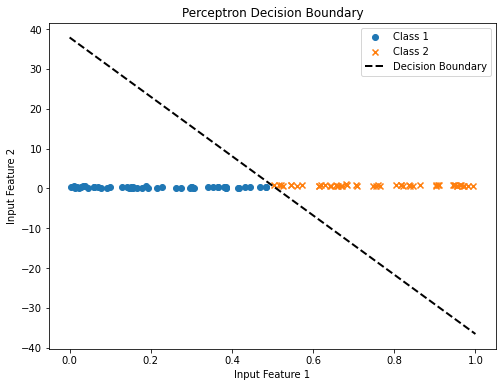

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        # Initialize weights and bias
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        # Predict the output (1 or -1) based on the current weights and bias
        activation = np.dot(inputs, self.weights) + self.bias
        return 1 if activation >= 0 else -1

    def train(self, training_data, labels):
        for epoch in range(self.epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)

                # Update weights and bias using the perceptron learning rule
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)

            # Print accuracy for every 10 epochs
            if epoch % 10 == 0:
                accuracy = self.evaluate(training_data, labels)
                print(f"Epoch {epoch}/{self.epochs}, Accuracy: {accuracy:.2%}")

    def evaluate(self, inputs, labels):
        predictions = np.array([self.predict(x) for x in inputs])
        accuracy = np.mean(predictions == labels)
        return accuracy

    def decision_boundary(self, x):
        # Decision boundary equation for 2D input
        return -(self.weights[0] * x + self.bias) / self.weights[1]

# Example usage:
input_size = 2  # 2D input for visualization
perceptron = Perceptron(input_size)

# Generate a simple dataset for binary classification
np.random.seed(42)
class_1 = np.random.rand(50, input_size) * 0.5
class_2 = np.random.rand(50, input_size) * 0.5 + 0.5
training_data = np.concatenate((class_1, class_2), axis=0)
labels = np.concatenate((np.ones(50), -np.ones(50)))

# Train the perceptron
perceptron.train(training_data, labels)

# Visualize the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(class_1[:, 0], class_1[:, 1], label='Class 1', marker='o')
plt.scatter(class_2[:, 0], class_2[:, 1], label='Class 2', marker='x')
plt.xlabel('Input Feature 1')
plt.ylabel('Input Feature 2')

# Plot the decision boundary
x_boundary = np.linspace(0, 1, 100)
y_boundary = perceptron.decision_boundary(x_boundary)
plt.plot(x_boundary, y_boundary, color='black', linestyle='dashed', linewidth=2, label='Decision Boundary')

plt.title('Perceptron Decision Boundary')
plt.legend()
plt.show()